In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = keras.applications.VGG16(weights='imagenet')

553467096/553467096 [==============================] - 17s 0us/step


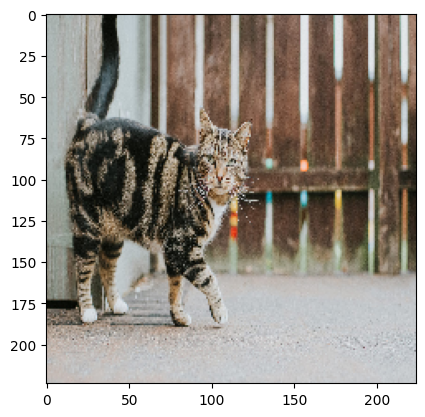

In [3]:
_img = keras.preprocessing.image.load_img('tabby_cat.jpg',target_size=(224,224))
plt.imshow(_img)
plt.show()

In [4]:
#preprocess image to get it into the right format for the model
img = keras.preprocessing.image.img_to_array(_img)
img = img.reshape((1, *img.shape))
y_pred = model.predict(img)

1/1 [==============================] - 1s 1s/step


In [7]:
y_pred.max()

0.3173763

In [8]:
images = tf.Variable(img, dtype=float)

with tf.GradientTape() as tape:
    pred = model(images, training=False)
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]
    
grads = tape.gradient(loss, images)

In [9]:
dgrad_abs = tf.math.abs(grads)

In [10]:
dgrad_max_ = np.max(dgrad_abs, axis=3)[0]

In [11]:
## normalize to range between 0 and 1
arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

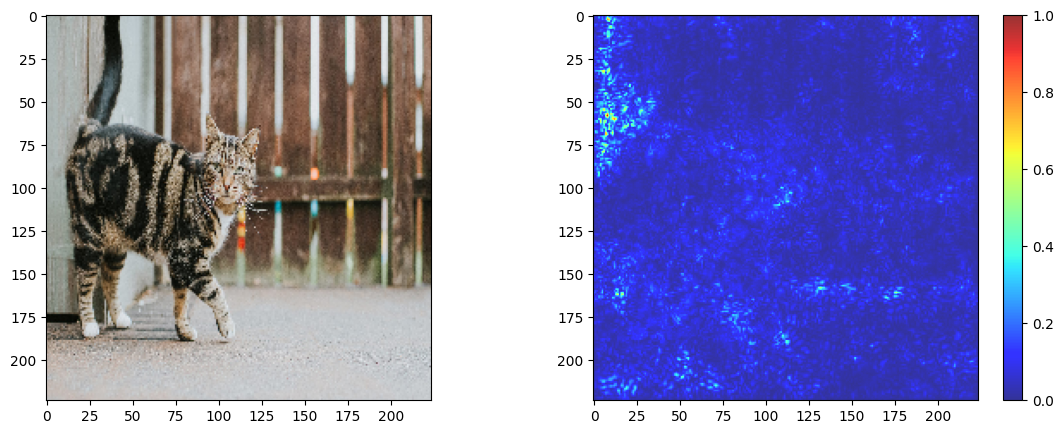

In [12]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(_img)
i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
fig.colorbar(i)

### Reference:
https://usmanr149.github.io/urmlblog/cnn/2020/05/01/Salincy-Maps.html